In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from os import listdir
train_data_li = listdir('./train/')
train_data_li

['train_activity.csv',
 'train_combat.csv',
 'train_label.csv',
 'train_payment.csv',
 'train_pledge.csv',
 'train_trade.csv']

In [3]:
import sys
mod = sys.modules[__name__]
for name in train_data_li:
    setattr(mod, name.split('.')[0], pd.read_csv('./train/' + name))

In [4]:
train_activity.shape, train_combat.shape, train_pledge.shape, train_trade.shape, train_payment.shape, train_label.shape

((1601834, 17),
 (1574671, 13),
 (1083384, 15),
 (1849325, 11),
 (66432, 3),
 (40000, 3))

# 20190820

In [19]:
train_activity

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,1.10514,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.000000,0.00000,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,0.011777,0.0
5,1,83200,109264,aa,0.074901,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
6,1,83200,396160,aa,0.245769,0.000000,0.047436,0.000000,0.000000,0,0.000000,0.000000,0.0,0.241790,0.00000,0.000000,0.0
7,1,13896,302284,aa,0.004681,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
8,1,13896,95032,aa,0.414296,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.000337,0.0
9,1,13896,374971,aa,0.007022,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.141990,0.0


In [22]:
df = train_activity[
    [col for col in train_activity.columns if col not in ['server',  'char_id']]
].groupby(['day', 'acc_id']).sum().reset_index()
df.head()

,day,acc_id,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,2,2.703457,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0
1,1,8,0.463450,3.094180,8.604148,0.000000,0.375125,0,0.0,0.0,0.0,0.0,0.000000,0.732584,0.0
2,1,17,0.327692,0.180798,0.006721,0.010488,0.000000,0,0.0,0.0,0.0,0.0,0.000000,-0.005380,0.0
3,1,20,0.285560,3.840013,0.028034,0.000000,0.000434,0,0.0,0.0,0.0,0.0,0.000000,-0.041201,0.0
4,1,31,1.718041,1.710315,0.006548,0.006899,0.000000,0,0.0,0.0,0.0,0.0,0.000000,0.018021,0.0


In [23]:
df_grouped = df.groupby('day')
p = df_grouped.get_group(1)
for i in range(2, 29):
    p = pd.merge(p, df_grouped.get_group(i), on='acc_id', how='outer',
                 suffixes=('_'+str(i-1), '_'+str(i)))
p = p[[col for col in p.columns if ('day' not in col) & ('char' not in col)]]
p = p.fillna(0).set_index('acc_id')

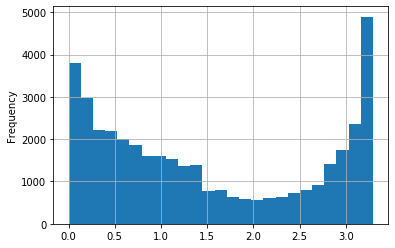

In [59]:
playtime_daily = train_activity.groupby(['acc_id', 'day'])['playtime'].sum().unstack().fillna(0)
exp_weights = np.sqrt(np.arange(1, 29)) / np.sqrt(np.arange(1, 29)).sum()
playtime_exp = playtime_daily * exp_weights
playtime_exp.sum(axis=1).plot.hist(bins=25, grid=True)

In [71]:
df = p.reset_index()
df.head()

,acc_id,playtime_1,npc_kill_1,solo_exp_1,party_exp_1,quest_exp_1,rich_monster_1,death_1,revive_1,exp_recovery_1,...,party_exp_28,quest_exp_28,rich_monster_28,death_28,revive_28,exp_recovery_28,fishing_28,private_shop_28,game_money_change_28,enchant_count_28
0,2,2.703457,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,3.134176,-0.016633,0.0
1,8,0.463450,3.094180,8.604148,0.000000,0.375125,0.0,0.0,0.0,0.0,...,0.000000,0.020823,0,0.0,0.0,0.0,0.646021,0.000000,0.018471,0.0
2,17,0.327692,0.180798,0.006721,0.010488,0.000000,0.0,0.0,0.0,0.0,...,0.004417,0.000000,0,0.0,0.0,0.0,3.370505,0.000000,0.000521,0.0
3,20,0.285560,3.840013,0.028034,0.000000,0.000434,0.0,0.0,0.0,0.0,...,0.015581,0.000868,0,0.0,0.0,0.0,0.408483,0.000000,0.029936,0.0
4,31,1.718041,1.710315,0.006548,0.006899,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.041633,0.0


In [72]:
p2 = pd.DataFrame(playtime_exp.sum(axis=1), columns=['exp_playtime']).reset_index()
df = pd.merge(df, p2, on='acc_id')
df.head()

,acc_id,playtime_1,npc_kill_1,solo_exp_1,party_exp_1,quest_exp_1,rich_monster_1,death_1,revive_1,exp_recovery_1,...,quest_exp_28,rich_monster_28,death_28,revive_28,exp_recovery_28,fishing_28,private_shop_28,game_money_change_28,enchant_count_28,exp_playtime
0,2,2.703457,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.000000,3.134176,-0.016633,0.0,3.281321
1,8,0.463450,3.094180,8.604148,0.000000,0.375125,0.0,0.0,0.0,0.0,...,0.020823,0,0.0,0.0,0.0,0.646021,0.000000,0.018471,0.0,0.671846
2,17,0.327692,0.180798,0.006721,0.010488,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,3.370505,0.000000,0.000521,0.0,1.044476
3,20,0.285560,3.840013,0.028034,0.000000,0.000434,0.0,0.0,0.0,0.0,...,0.000868,0,0.0,0.0,0.0,0.408483,0.000000,0.029936,0.0,0.965374
4,31,1.718041,1.710315,0.006548,0.006899,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0,0.0,0.0,0.0,0.000000,0.000000,0.041633,0.0,2.950004


In [80]:
train_activity.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0


In [110]:
d = pd.DataFrame(list(set([(i, j) for i,j in train_activity[['day', 'acc_id']].values])), columns=['day', 'acc_id'])

In [115]:
df = pd.merge(df, d.groupby('acc_id').count().reset_index(), on='acc_id')

In [128]:
train_act_time = train_activity[['acc_id', 'day', 'playtime', 'fishing', 'private_shop']]

In [130]:
train_act_time = train_act_time.groupby(['acc_id', 'day']).sum()
train_act_time.head(10)

playtime  fishing  private_shop
acc_id day                                 
2      1    2.703457      0.0      2.462447
       2    3.363522      0.0      3.149118
       3    3.370544      0.0      3.183447
       4    3.370544      0.0      3.131992
       5    3.370544      0.0      3.135698
       6    3.370544      0.0      3.134957
       7    3.370544      0.0      3.135230
       8    2.768995      0.0      2.544370
       9    3.361181      0.0      3.072071
       10   3.370544      0.0      3.145177

In [132]:
train_act_time['resttime'] = train_act_time['fishing'] + train_act_time['private_shop']
train_act_time.head(10)

playtime  fishing  private_shop  resttime
acc_id day                                           
2      1    2.703457      0.0      2.462447  2.462447
       2    3.363522      0.0      3.149118  3.149118
       3    3.370544      0.0      3.183447  3.183447
       4    3.370544      0.0      3.131992  3.131992
       5    3.370544      0.0      3.135698  3.135698
       6    3.370544      0.0      3.134957  3.134957
       7    3.370544      0.0      3.135230  3.135230
       8    2.768995      0.0      2.544370  2.544370
       9    3.361181      0.0      3.072071  3.072071
       10   3.370544      0.0      3.145177  3.145177

In [133]:
train_act_time['tr_play'] = (train_act_time['playtime'] - train_act_time['resttime']) / train_act_time['playtime']
train_act_time['tr_rest'] = train_act_time['resttime'] / train_act_time['playtime']
train_act_time.head(10)

playtime  fishing  private_shop  resttime   tr_play   tr_rest
acc_id day                                                               
2      1    2.703457      0.0      2.462447  2.462447  0.089149  0.910851
       2    3.363522      0.0      3.149118  3.149118  0.063744  0.936256
       3    3.370544      0.0      3.183447  3.183447  0.055509  0.944491
       4    3.370544      0.0      3.131992  3.131992  0.070775  0.929225
       5    3.370544      0.0      3.135698  3.135698  0.069676  0.930324
       6    3.370544      0.0      3.134957  3.134957  0.069896  0.930104
       7    3.370544      0.0      3.135230  3.135230  0.069815  0.930185
       8    2.768995      0.0      2.544370  2.544370  0.081121  0.918879
       9    3.361181      0.0      3.072071  3.072071  0.086014  0.913986
       10   3.370544      0.0      3.145177  3.145177  0.066863  0.933137

In [138]:
rest = train_act_time['tr_rest'].unstack().fillna(1)
play = train_act_time['tr_play'].unstack().fillna(0)

In [140]:
rest.columns = ['rest_'+str(i) for i in range(1, 29)]
play.columns = ['play_'+str(i) for i in range(1, 29)]

In [145]:
exp_weights = np.sqrt(np.arange(1, 29)) / np.sqrt(np.arange(1, 29)).sum()
rest['exp_rest'] = (rest * exp_weights).sum(axis=1)
play['exp_play'] = (play * exp_weights).sum(axis=1)

,day,acc_id,playtime,fishing,private_shop
1567342,28,17,0.100648,3.370505,0.0


In [148]:
train_act_time.loc[17].tail()

,playtime,fishing,private_shop,resttime,tr_play,tr_rest
day,,,,,,
24,1.680590,0.263324,0.0,0.263324,0.843315,0.156685
25,1.390349,0.742573,0.0,0.742573,0.465909,0.534091
26,1.500360,0.614422,0.0,0.614422,0.590484,0.409516
27,0.816889,1.403964,0.0,1.403964,-0.718672,1.718672
28,0.100648,3.370505,0.0,3.370505,-32.487984,33.487984


In [146]:
rest

,rest_1,rest_2,rest_3,rest_4,rest_5,rest_6,rest_7,rest_8,rest_9,rest_10,...,rest_20,rest_21,rest_22,rest_23,rest_24,rest_25,rest_26,rest_27,rest_28,exp_rest
acc_id,,,,,,,,,,,,,,,,,,,,,
2,0.910851,0.936256,0.944491,0.929225,0.930324,0.930104,0.930185,0.918879,0.913986,0.933137,...,0.930347,0.908565,0.930648,0.919745,0.930405,0.928785,0.930255,0.929711,0.929873,0.927021
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.034685,0.000000,0.000000,0.454693,0.000000,5.194024,0.839789
8,0.000000,0.000000,0.445545,0.000000,0.420673,0.000000,0.000000,0.745033,0.000000,0.771257,...,0.000000,0.386323,0.000000,0.000000,0.449750,0.000000,0.000000,0.000000,0.480836,0.163834
17,0.000000,0.000000,0.000000,0.000000,0.227015,0.769001,0.000000,0.143326,0.420865,0.432226,...,0.000000,0.352052,0.000000,0.000000,0.156685,0.534091,0.409516,1.718672,33.487984,2.023801
20,0.000000,0.000000,0.000000,0.000000,0.451843,0.000000,0.000000,0.000000,0.000000,0.480229,...,0.428621,0.000000,0.000000,0.677015,0.218123,0.224659,0.412738,0.000000,0.324380,0.222975
21,1.000000,0.931627,0.618775,0.830952,0.887391,0.979494,0.526722,0.568665,0.596770,0.819848,...,0.996382,0.400237,0.979971,0.800000,0.000000,0.046177,0.598524,1.000000,0.755699,0.624134
31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
38,0.000000,0.474371,0.412538,0.317329,0.442103,0.506558,0.482705,0.000000,0.457058,0.482116,...,0.508933,0.348401,0.457783,0.000000,0.254310,0.604078,0.387359,0.098084,0.351836,0.334509
41,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.947723


In [174]:
df = pd.merge(df, rest.reset_index(), on='acc_id')
df = pd.merge(df, play.reset_index(), on='acc_id')

In [176]:
label = np.where(train_label.set_index('acc_id').loc[p.index]['survival_time'].values == 64, 1, 0)
label

array([1, 1, 1, ..., 0, 0, 0])

# XGBoost Baseline 2

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], label, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((21000, 424), (7000, 424), (12000, 424), (21000,), (7000,), (12000,))

In [190]:
import xgboost as xgb

params =   {
    'learning_rate': 0.02, 
    'gamma' : 0.3, 
    'min_child_weight' : 3,
    'nthread' : 15,
    'max_depth' : 30,
    'subsample' : 0.9,
    'eval_metric' : 'auc',
    'colsample_bytree' : 0.8, 
    'num_boost_round' : 500,
    'n_estimators': 200,
    'max_leaves': 300
}

In [191]:
VALID = True
if VALID == True:

    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)

    #del X_train, X_valid, y_train, y_valid  ; gc.collect()

    watchlist = [(tr_data, 'train'), (va_data, 'valid')]

    model = xgb.train(params, tr_data, 500, watchlist, maximize=False, 
                      early_stopping_rounds = 30, verbose_eval=50)

[0]	train-auc:0.961071	valid-auc:0.745267
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.999885	valid-auc:0.834848
[100]	train-auc:0.999917	valid-auc:0.839102
[150]	train-auc:0.999915	valid-auc:0.840234
[200]	train-auc:0.999914	valid-auc:0.840696
[250]	train-auc:0.999914	valid-auc:0.841057
[300]	train-auc:0.999914	valid-auc:0.84122
[350]	train-auc:0.999915	valid-auc:0.841351
[400]	train-auc:0.999915	valid-auc:0.841468
[450]	train-auc:0.999916	valid-auc:0.841491
Stopping. Best iteration:
[456]	train-auc:0.999916	valid-auc:0.841508



In [192]:
model.save_model('0004.model')

In [193]:
y_pred = np.where(model.predict(xgb.DMatrix(X_test)) > 0.5, 1, 0)

In [194]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.76025, 0.7851221151691687)

# Cox & WTTE

In [183]:
X_train

,acc_id,playtime_1,npc_kill_1,solo_exp_1,party_exp_1,quest_exp_1,rich_monster_1,death_1,revive_1,exp_recovery_1,...,play_20,play_21,play_22,play_23,play_24,play_25,play_26,play_27,play_28,exp_play
32395,89444,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694798,1.000000,0.252619
18624,77691,0.339395,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.280044,0.019355,0.039461,1.000000,0.013514,0.566493
37537,118731,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.015765,0.039583,0.020326,0.018292,0.052820,0.012462,0.017088,0.005575,0.031341,0.024651
24735,103106,1.851458,2.408837,0.006882,0.001808,0.000217,0.0,0.000000,0.000000,0.0,...,1.000000,0.929791,1.000000,1.000000,0.776773,0.000000,1.000000,0.000000,0.859969,0.533519
19285,80429,0.646021,0.604913,6.153319,0.000000,3.489409,1.0,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.497626,0.852979,0.568696,0.836944,0.729802
20168,84047,0.543032,0.413977,0.003070,0.000079,0.000000,0.0,0.245883,0.247337,0.0,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.952620
6883,29130,0.404933,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.018416,0.028099,0.011210,0.015593,0.006332,0.014479,0.024146,0.027437,0.003251,0.031936
21518,89632,0.149802,2.078670,0.143704,0.000000,0.003470,0.0,0.000000,0.000000,0.0,...,0.678116,0.113757,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.573687
7163,30218,2.768995,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.041296,0.033704,0.039988,0.047137,0.040012,0.040185,0.038158,0.039676,0.041007,0.040024
1199,5160,1.727404,3.692334,0.354835,0.000000,0.006941,0.0,0.000000,0.000000,0.0,...,0.897319,0.724080,0.346386,0.736614,0.512183,0.830378,0.164124,0.224803,-0.070449,0.483502


# 이상해

In [153]:
train_activity[(train_activity['acc_id'] == 17) & (train_activity['day'] == 28)][
    ['day', 'acc_id', 'playtime', 'fishing', 'private_shop']]

,day,acc_id,playtime,fishing,private_shop
1567342,28,17,0.100648,3.370505,0.0


In [162]:
train_activity[train_activity['playtime'] < train_activity['fishing']][['playtime', 'fishing']]

,playtime,fishing
424,0.149802,3.350297
1289,0.407274,3.161289
1458,0.709219,2.861373
2672,0.145121,3.271378
3432,0.276197,2.917588
4610,0.690493,3.348268
4719,0.435362,3.097935
4824,0.381527,3.039614
5425,0.702197,3.362780
5621,0.301945,3.363326


In [158]:
test = train_activity[train_activity['playtime'] < train_activity['fishing']]

In [165]:
test[test['playtime'] != 0].shape

(11915, 17)

Text(0.5, 1.0, 'fishingtime histogram')

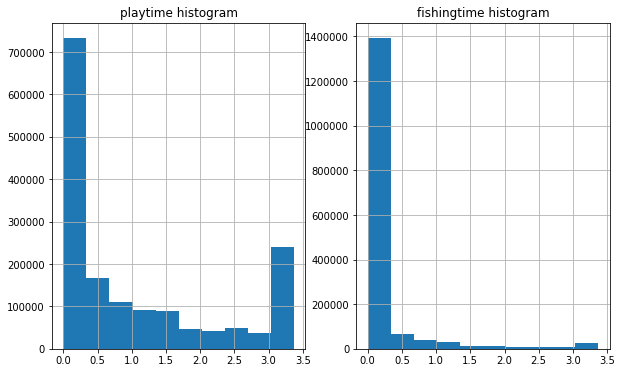

In [172]:
fig = plt.figure(figsize=(10, 6), facecolor='w')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
train_activity['playtime'].hist(ax=ax1)
train_activity['fishing'].hist(ax=ax2)
ax1.set_title('playtime histogram')
ax2.set_title('fishingtime histogram')

Text(0.5, 1.0, 'fishingtime histogram')

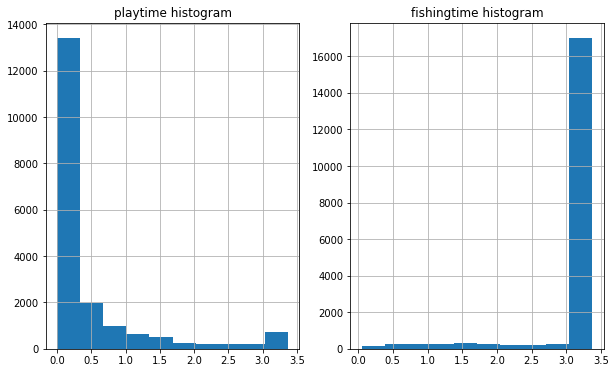

In [173]:
fig = plt.figure(figsize=(10, 6), facecolor='w')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
test['playtime'].hist(ax=ax1)
test['fishing'].hist(ax=ax2)
ax1.set_title('playtime histogram')
ax2.set_title('fishingtime histogram')